# Linear Regression Examples

+ Standard and regularized linear regression with sklearn and stats models
+ We use synthetic rather than real life data


## Data Generation

### Packages

In [10]:
%matplotlib inline
# data and plotting packages
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# modeling packages
from sklearn import  linear_model
import statsmodels.api as sm

### Display Settings

In [11]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['legend.fontsize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'


### Data Generation

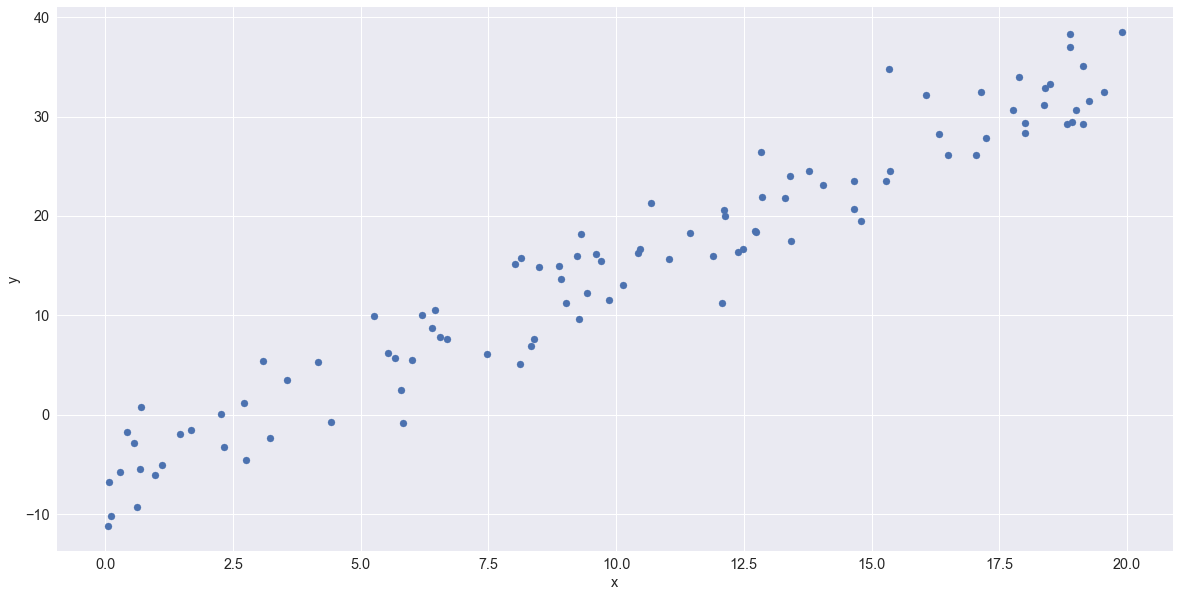

In [9]:
nobs = 100          # number of observations
w0 = -5             # intercept
w1 = 2              # slope
sigma = 3           # volatility
xscale = 20         # for rescaling random uniforms in [0, 1]

rng = np.random.RandomState(12)
x = xscale * rng.rand(nobs)
y = w0 + w1 * x + sigma * rng.randn(nobs)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y');  

### Linear Regression Model

#### Fit-predict-plot-print using Scikit-Learn

const: -6.1565         w0: -5
coeff: [2.0677]         w1: 2


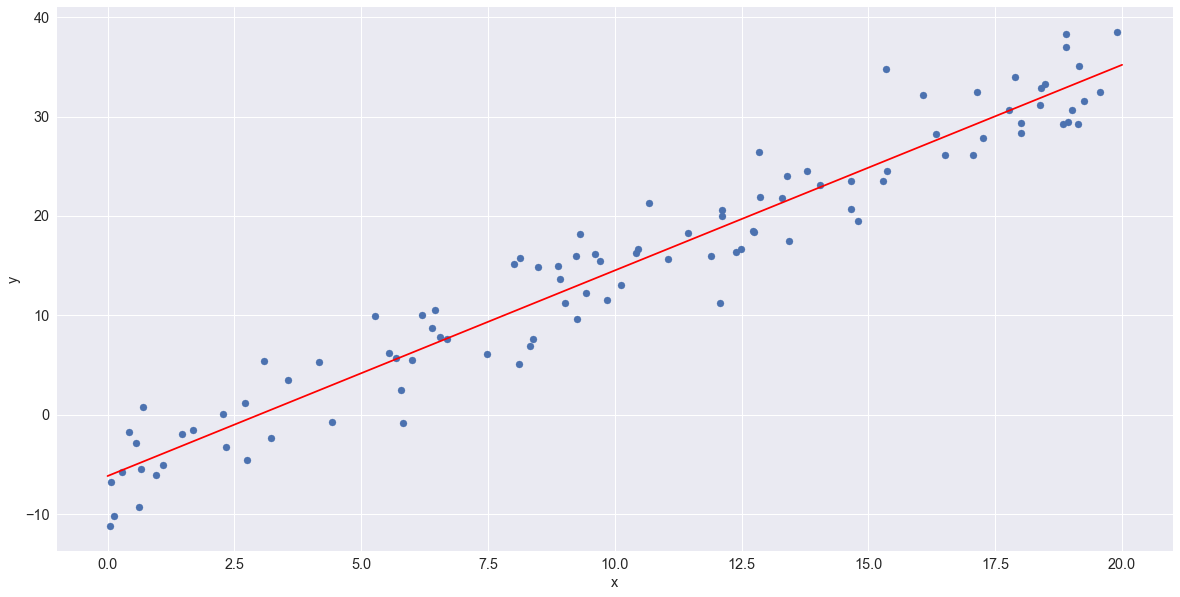

In [4]:
lm = linear_model.LinearRegression(fit_intercept=True)
lm.fit(x[:, np.newaxis], y)   # NOTE: fitting modifies the object

xnew = np.linspace(0, xscale, nobs)
ynew = lm.predict(xnew[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xnew, ynew, '-r')
plt.xlabel('x')
plt.ylabel('y')

print("const: {}         w0: {}".format(np.round(lm.intercept_, 4), w0))
print("coeff: {}         w1: {}".format(np.round(lm.coef_, 4), w1))

#### Fit-predict-plot-print using StatsModels

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     1463.
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           1.01e-60
Time:                        17:45:36   Log-Likelihood:                -258.78
No. Observations:                 100   AIC:                             521.6
Df Residuals:                      98   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.1565      0.640     -9.626      0.0

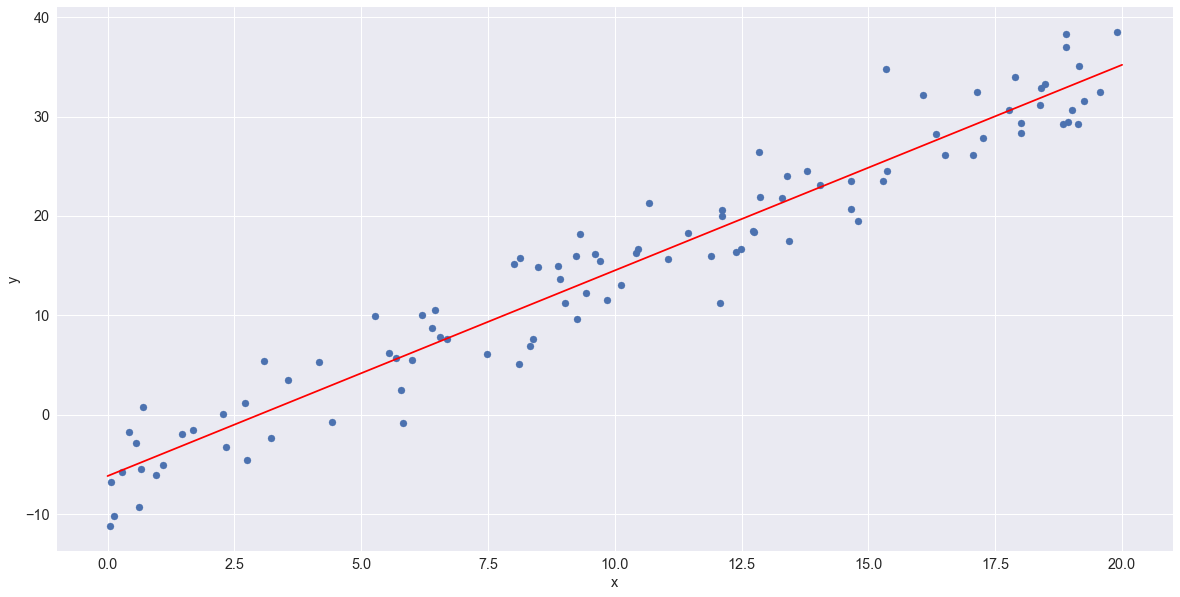

In [5]:
# This handles the intercept. 
# Statsmodel takes 0 intercept by default
X = sm.add_constant(x)

mdl = sm.OLS(y, X)
res = mdl.fit()

# Get the predicted values for dependent variable
Xnew = sm.add_constant(xnew)
ynew = res.predict(Xnew)

# View Model stats
print(res.summary())

plt.scatter(x, y)
plt.plot(xnew, ynew, '-r')
plt.xlabel('x')
plt.ylabel('y');

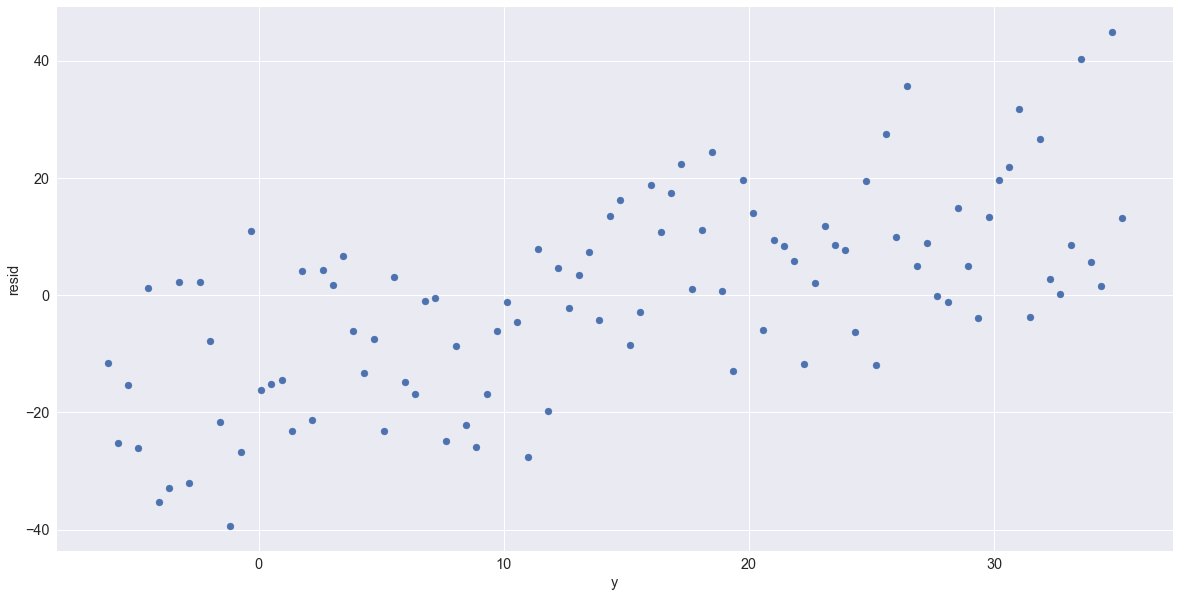

In [6]:
plt.scatter(ynew, ynew - y)
plt.xlabel('y')
plt.ylabel('resid');

### Multivariate Linear Model and Regularization

We use the Scikit-Learn make_regression function to generate a random linear model.  
We also use the Ridge class to perform L2 regularized regression for various values of alpha

In [7]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [8]:
XX, yy, ww = make_regression(n_samples=10, n_features=10, coef=True, random_state=1, bias=3.5)

# range of alphas to explore
ralphas = np.logspace(-5, 5, 200)

rcoefs = []
rerrors = []
rdg = Ridge()
# Train the model with different regularisation strengths
for a in ralphas:
    rdg.set_params(alpha=a)
    rdg.fit(XX, yy)
    rcoefs.append(rdg.coef_)
    rerrors.append(mean_squared_error(rdg.coef_, ww))


We display the ten weights and the MSE as a function of alpha

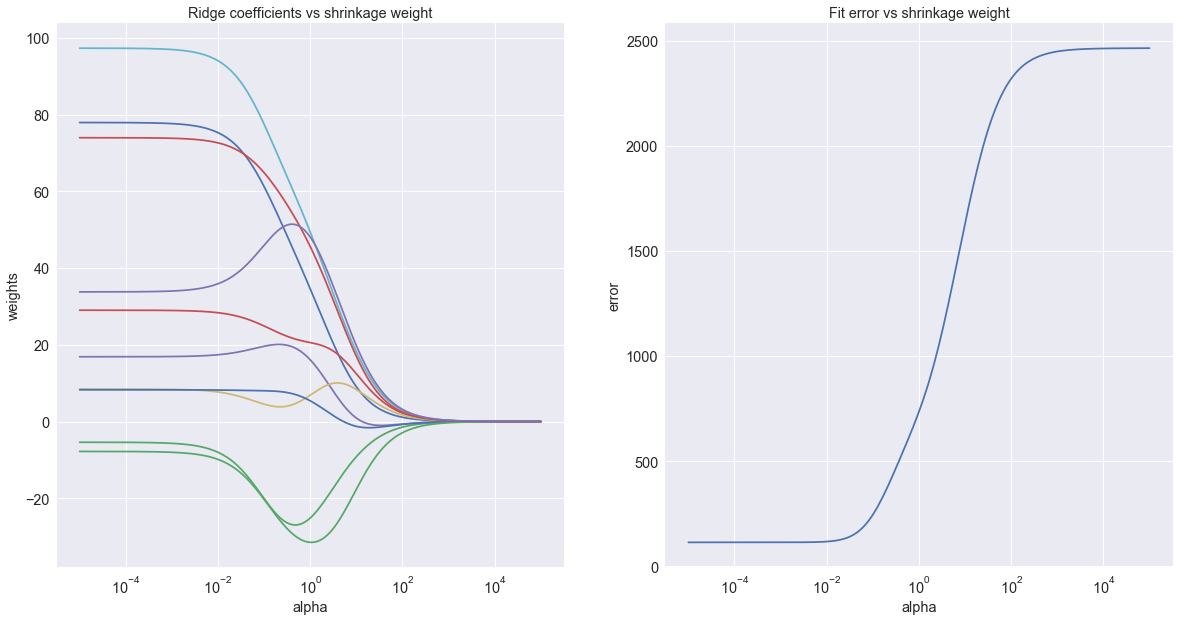

In [9]:
# Display results
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(hspace=1)

ax1.plot(ralphas, rcoefs)
ax1.set(xscale='log', xlabel='alpha', ylabel='weights')
ax1.set(title='Ridge coefficients vs shrinkage weight')

ax2.plot(ralphas, rerrors)
ax2.set(xscale='log', xlabel='alpha', ylabel='error')
ax2.set(title='Fit error vs shrinkage weight');

We reuse the previously generated dataset and fit a Lasso model

In [10]:
# range of alphas to explore
lalphas = np.logspace(-1, 2, 200)

lcoefs = []
lerrors = []
las = Lasso()
# Train the model with different regularisation strengths
for a in lalphas:
    las.set_params(alpha=a)
    las.fit(XX, yy)
    lcoefs.append(las.coef_)
    lerrors.append(mean_squared_error(las.coef_, ww))

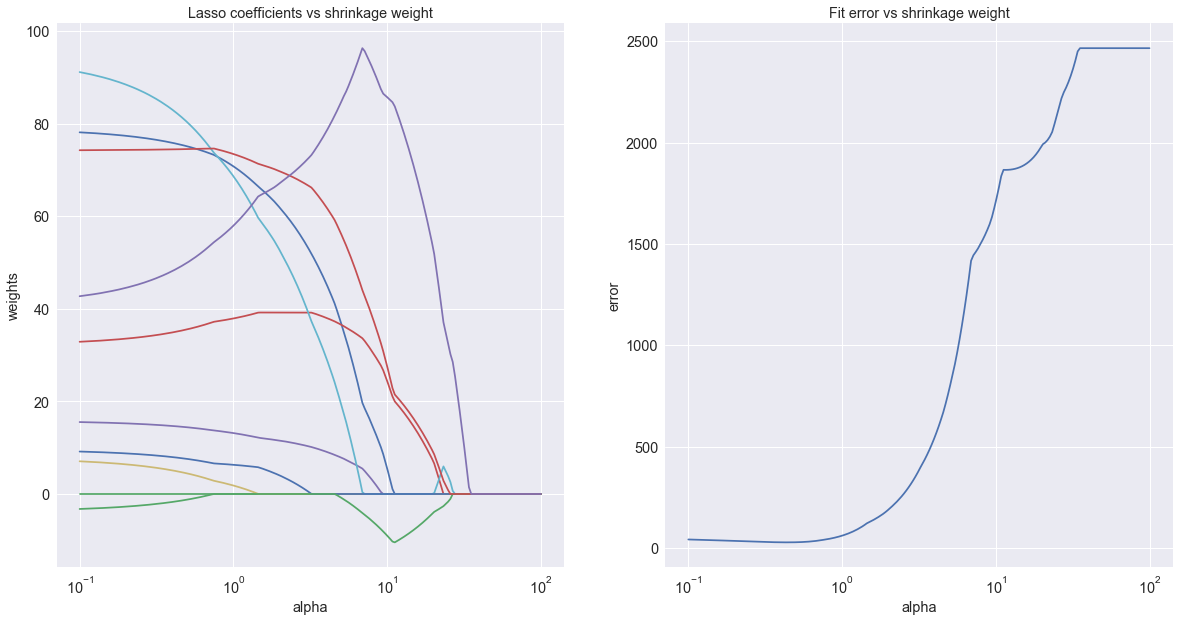

In [11]:
# Display results
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(hspace=1)

ax1.plot(lalphas, lcoefs)
ax1.set(xscale='log', xlabel='alpha', ylabel='weights')
ax1.set(title='Lasso coefficients vs shrinkage weight')

ax2.plot(lalphas, lerrors)
ax2.set(xscale='log', xlabel='alpha', ylabel='error')
ax2.set(title='Fit error vs shrinkage weight');

Note how the coefficients are driven to zero and get stuck there as alpha increases.